## Global Food Price

In [1]:
#Importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 
pd.options.display.float_format = "{:,.2f}".format
sns.set(rc={'figure.figsize':(12,8)})
import warnings
warnings.filterwarnings("ignore")

In [2]:
gfp = pd.read_csv('wfpvam_foodprices.csv')

In [3]:
#Setting display
pd.set_option('display.max_columns', 100) 
pd.set_option('display.max_rows', 500) 
pd.set_option('display.width', 1000) 

In [4]:
gfp.head()

,date,country,city,market,currency,type,unit,mp_month,mp_year,mp_price,product
0,2000-01-01,Bassas da India,North/Amajyaruguru,Bhopal,INR,Retail,KG,1,2000,7.50,Wheat
1,2000-01-01,Mozambique,North/Amajyaruguru,AngÃ³nia,MZN,Retail,KG,1,2000,9.22,Rice
2,2000-01-01,Ethiopia,Addis Ababa,Addis Ababa,ETB,Wholesale,100 KG,1,2000,187.25,Sorghum (white)
3,2000-01-01,South Africa,Gauteng,Randfontein,ZAR,Wholesale,KG,1,2000,0.65,Wheat
4,2000-01-01,Bassas da India,North/Amajyaruguru,Bhubaneshwar,INR,Retail,KG,1,2000,16.50,Sugar


In [5]:
print(f"This data comtains {gfp.shape[0]} rows and {gfp.shape[1]} columns")

This data comtains 1853855 rows and 11 columns


In [6]:
gfp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1853855 entries, 0 to 1853854
Data columns (total 11 columns):
 #   Column    Dtype  
---  ------    -----  
 0   date      object 
 1   country   object 
 2   city      object 
 3   market    object 
 4   currency  object 
 5   type      object 
 6   unit      object 
 7   mp_month  int64  
 8   mp_year   int64  
 9   mp_price  float64
 10  product   object 
dtypes: float64(1), int64(2), object(8)
memory usage: 155.6+ MB


In [7]:
gfp.head()

,date,country,city,market,currency,type,unit,mp_month,mp_year,mp_price,product
0,2000-01-01,Bassas da India,North/Amajyaruguru,Bhopal,INR,Retail,KG,1,2000,7.50,Wheat
1,2000-01-01,Mozambique,North/Amajyaruguru,AngÃ³nia,MZN,Retail,KG,1,2000,9.22,Rice
2,2000-01-01,Ethiopia,Addis Ababa,Addis Ababa,ETB,Wholesale,100 KG,1,2000,187.25,Sorghum (white)
3,2000-01-01,South Africa,Gauteng,Randfontein,ZAR,Wholesale,KG,1,2000,0.65,Wheat
4,2000-01-01,Bassas da India,North/Amajyaruguru,Bhubaneshwar,INR,Retail,KG,1,2000,16.50,Sugar


In [8]:
gfp['country'].unique()

array(['Bassas da India', 'Mozambique', 'Ethiopia', 'South Africa',
       'Afghanistan', 'Burkina Faso', 'Mexico', 'Senegal', 'Niger',
       'Philippines', 'Somalia', 'Guatemala', 'Thailand', 'Peru',
       'Colombia', 'Rwanda', 'Nicaragua', 'Bangladesh', 'Sudan', 'Togo',
       'Nepal', 'Tajikistan', 'Nigeria', 'Benin', 'Zambia', 'Mali',
       'Burundi', 'Cambodia', 'Malawi', 'Chad', 'Mauritania', 'Sri Lanka',
       'Madagascar', 'Pakistan', 'Central African Republic', 'Swaziland',
       'Kyrgyzstan', 'El Salvador', 'Ecuador', 'Argentina', 'Haiti',
       'Cameroon', 'Djibouti', "Cote d'Ivoire", 'Kazakhstan', 'Gambia',
       'Panama', 'United Republic of Tanzania', 'Ghana', 'Kenya',
       'Dominican Republic', 'Uganda', 'South Sudan',
       "Lao People's Democratic Republic", 'Cape Verde', 'Bhutan',
       'Liberia', 'State of Palestine', 'Azerbaijan', 'Gabon',
       'Democratic Republic of the Congo', 'Indonesia', 'Mongolia',
       'Honduras', 'Georgia', 'Eritrea', 'Guinea-

In [9]:
gfp.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
date,1853855,257,2020-10-01,35139,NaN,NaN,NaN,NaN,NaN,NaN,NaN
country,1853855,98,Rwanda,136993,NaN,NaN,NaN,NaN,NaN,NaN,NaN
city,1853855,616,North/Amajyaruguru,590855,NaN,NaN,NaN,NaN,NaN,NaN,NaN
market,1853855,3193,National Average,17897,NaN,NaN,NaN,NaN,NaN,NaN,NaN
currency,1853855,84,XOF,244565,NaN,NaN,NaN,NaN,NaN,NaN,NaN
type,1853855,4,Retail,1687288,NaN,NaN,NaN,NaN,NaN,NaN,NaN
unit,1853855,113,KG,1446536,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mp_month,"1,853,855.00",NaN,NaN,NaN,6.39,3.46,1.00,3.00,6.00,9.00,12.00
mp_year,"1,853,855.00",NaN,NaN,NaN,"2,015.95",4.23,"2,000.00","2,013.00","2,017.00","2,020.00","2,021.00"
mp_price,"1,853,855.00",NaN,NaN,NaN,"6,660.04","112,197.62",0.00,42.50,235.00,"1,100.00","21,777,780.00"


In [10]:
#Checking for missing data
gfp.isnull().sum()

date        0
country     0
city        0
market      0
currency    0
type        0
unit        0
mp_month    0
mp_year     0
mp_price    0
product     0
dtype: int64

In [11]:
#gfp['city'].value_counts()

In [12]:
gfp['city'].fillna(gfp['city'].mode()[0], inplace=True)

In [13]:
curr_convert = pd.read_csv('currency convert.csv')
curr_convert.head()

,Country,Currency,currency,Date,Rate Per Dollars $
0,Afghanistan,Afghanistan Afghani,AFN,30-Jun-21,79.15
1,Albania,Albania Lek(e),ALL,30-Jun-21,100.59
2,Algeria,Algerian Dinar,DZD,30-Jun-21,134.00
3,American Samoa,US Dollar,USD,30-Jun-21,1.00
4,Andorra,Euro,EUR,30-Jun-21,0.84


In [14]:
curr_convert.drop(['Currency', 'Country', 'Date'], axis = 1, inplace = True)

In [15]:
gfp_new= pd.merge(gfp, curr_convert, on=['currency'])

In [16]:
gfp_new.head()

,date,country,city,market,currency,type,unit,mp_month,mp_year,mp_price,product,Rate Per Dollars $
0,2000-01-01,Bassas da India,North/Amajyaruguru,Bhopal,INR,Retail,KG,1,2000,7.50,Wheat,74.19
1,2000-01-01,Bassas da India,North/Amajyaruguru,Bhubaneshwar,INR,Retail,KG,1,2000,16.50,Sugar,74.19
2,2000-01-01,Bassas da India,North/Amajyaruguru,Tiruvanantapuram,INR,Retail,KG,1,2000,72.50,Oil (mustard),74.19
3,2000-01-01,Bassas da India,North/Amajyaruguru,Shillong,INR,Retail,KG,1,2000,11.00,Rice,74.19
4,2000-01-01,Bassas da India,North/Amajyaruguru,Kolkata,INR,Retail,KG,1,2000,16.50,Sugar,74.19


In [17]:
#Checking for missing data
gfp_new.isnull().sum()

date                  0
country               0
city                  0
market                0
currency              0
type                  0
unit                  0
mp_month              0
mp_year               0
mp_price              0
product               0
Rate Per Dollars $    0
dtype: int64

In [18]:
gfp_new['price'] =  gfp_new['mp_price'] / gfp_new['Rate Per Dollars $']
gfp_new['price'].dtype

dtype('float64')

In [19]:
gfp_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4125441 entries, 0 to 4125440
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   date                object 
 1   country             object 
 2   city                object 
 3   market              object 
 4   currency            object 
 5   type                object 
 6   unit                object 
 7   mp_month            int64  
 8   mp_year             int64  
 9   mp_price            float64
 10  product             object 
 11  Rate Per Dollars $  float64
 12  price               float64
dtypes: float64(3), int64(2), object(8)
memory usage: 440.6+ MB


## Exploratary Data Analysis

In [20]:
gfp_new.describe()

,mp_month,mp_year,mp_price,Rate Per Dollars $,price
count,"4,125,441.00","4,125,441.00","4,125,441.00","4,125,441.00","4,125,441.00"
mean,6.38,"2,015.54","4,124.40","1,062.46",9.08
std,3.46,4.56,"75,638.75","3,589.02",182.61
min,1.00,"2,000.00",0.00,0.71,0.00
25%,3.00,"2,013.00",115.98,198.50,0.35
50%,6.00,"2,017.00",250.00,549.88,0.59
75%,9.00,"2,020.00",556.50,549.88,1.21
max,12.00,"2,021.00","21,777,780.00","235,130.00","73,699.72"


In [21]:
# %percentage production of each country
gfp_new['country'].value_counts(normalize=True)*100

Mali                               13.00
Niger                               9.40
Benin                               6.75
Burkina Faso                        6.44
Senegal                             6.41
Rwanda                              3.32
Cameroon                            3.15
Bassas da India                     3.05
Guinea-Bissau                       2.86
Chad                                2.66
El Salvador                         2.60
Syrian Arab Republic                2.12
Philippines                         1.87
Central African Republic            1.80
Nicaragua                           1.79
Indonesia                           1.75
Cote d'Ivoire                       1.50
Zimbabwe                            1.46
Burundi                             1.35
Kyrgyzstan                          1.34
Gambia                              1.24
Ecuador                             1.24
Nigeria                             1.15
Togo                                1.07
Zambia          

In [22]:
gfp_new.pivot_table(values=['price'],index=['country','product'],aggfunc=['max', 'min', 'mean', 'count', 'sum'])

max      min      mean count          sum
                                                             price    price     price price        price
country     product                                                                                     
Afghanistan Bread                                             0.90     0.08      0.49  1668       816.23
            Livestock (sheep, one-year-old alive female) 73,699.72 2,133.78 22,574.31   187 4,221,395.15
            Oil (cooking)                                     1.86     0.99      1.36   408       555.38
            Pulses                                            1.75     0.83      1.16   408       475.12
            Rice (high quality)                               1.44     0.88      1.10   408       450.36
...                                                            ...      ...       ...   ...          ...
Zimbabwe    Sorghum (biofortified)                            1.00     1.00      1.00    14        14.00
            Soybeans                                          2.14     2.00      2.07    28        57.96
            Sugar (white, fortified)                          3.00     0.75      1.27  1442     1,824.76
            Wheat                                             1.25     0.40      0.51   896       458.08
            Wheat flour (fortified)                           4.75     0.90      1.28  1106     1,410.64

[2074 rows x 5 columns]

In [23]:
gfp_new.groupby('country')['price'].sum().sort_values(ascending=False)[:25]


country
Honduras                      6,234,283.58
Costa Rica                    4,639,614.62
Afghanistan                   4,226,072.74
El Salvador                   3,851,985.42
Cameroon                      2,960,457.33
Mali                          1,908,790.18
Panama                        1,801,712.02
Burkina Faso                  1,451,012.84
Niger                         1,415,347.94
Chad                          1,260,796.97
Syrian Arab Republic            717,847.20
Nicaragua                       664,098.93
Nigeria                         602,515.42
Ethiopia                        586,989.36
United Republic of Tanzania     541,437.22
Ghana                           435,683.95
Colombia                        344,236.07
Benin                           302,392.61
Rwanda                          238,847.59
Bolivia                         219,824.81
Zimbabwe                        218,523.88
Guinea-Bissau                   187,069.75
Indonesia                       172,836.43
Bas

In [24]:
gfp_new.groupby('mp_year').sum()

,mp_month,mp_price,Rate Per Dollars $,price
mp_year,,,,
2000,59124,"60,398,320.33","12,287,351.43","648,633.85"
2001,75983,"141,808,189.46","13,910,680.37","1,578,536.56"
2002,105815,"182,089,449.53","14,672,919.75","2,017,805.67"
2003,157035,"28,181,394.13","19,884,521.67","11,095.25"
2004,166750,"38,739,430.33","21,807,081.06","12,822.57"
2005,273248,"38,900,976.78","24,911,487.29","287,855.21"
2006,305451,"119,962,814.04","29,353,432.47","317,654.74"
2007,620777,"140,447,157.67","56,158,233.81","878,455.94"
2008,701341,"257,979,597.64","66,929,972.35","1,994,725.92"


Text(0, 0.5, 'Price')

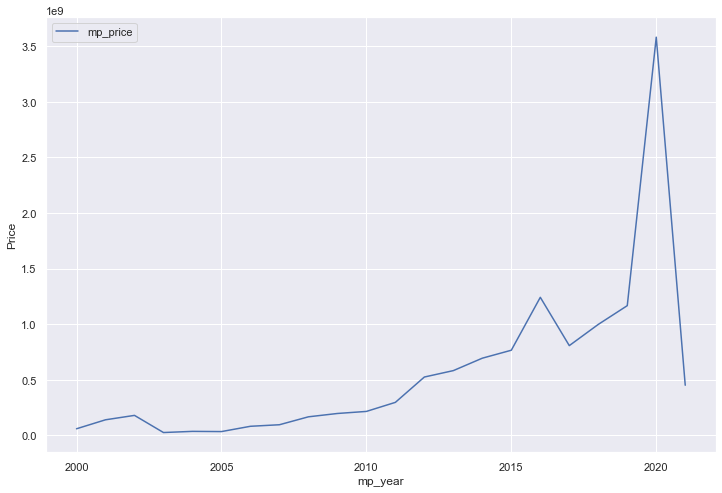

In [25]:
# Plot trend year-on-year
gfp.groupby('mp_year').sum().reset_index().plot(y='mp_price', x='mp_year',  figsize=(12,8))
plt.ylabel('Price')

In [26]:
items= gfp_new.groupby("product")["price"].sum().sort_values(ascending=False)[:25]
items

product
Rice (milled 80-20)                              4,724,914.98
Livestock (sheep, one-year-old alive female)     4,221,395.15
Beans (red)                                      3,491,236.23
Maize (white)                                    2,193,012.92
Beans (black)                                    2,161,274.00
Rice (imported)                                  1,683,845.61
Beans (silk red)                                 1,616,886.99
Rice                                             1,324,175.81
Livestock (cattle)                               1,252,031.61
Sorghum (white)                                  1,197,497.40
Millet                                             858,479.64
Maize flour (white)                                722,222.71
Groundnuts (shelled)                               711,716.74
Maize (yellow)                                     696,326.29
Sorghum (local)                                    563,303.02
Livestock (camel)                                  536,320.82


Text(0.5, 1.0, 'Top 25 items purchase around globe')

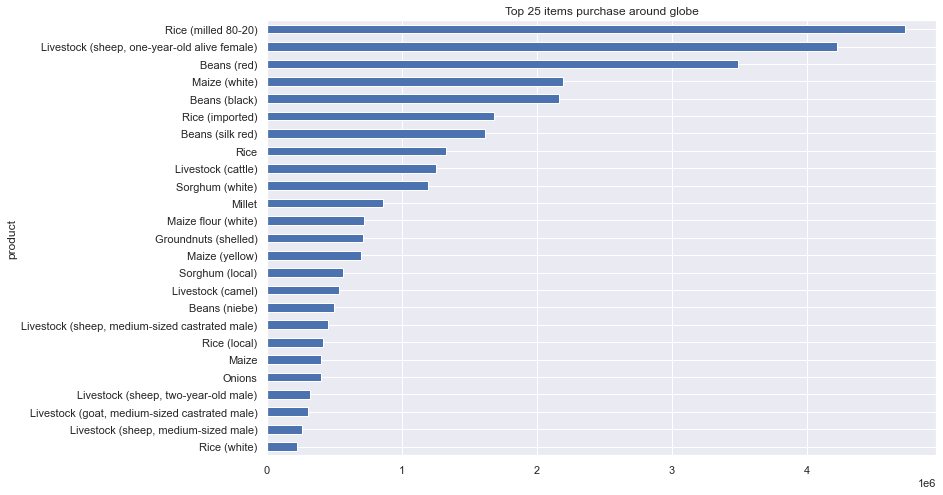

In [27]:
items.sort_values(ascending=True).plot(kind='barh', figsize=(12, 8))
plt.title("Top 25 items purchase around globe")

In [28]:
top_countries=gfp_new.groupby("country")["price"].sum().sort_values(ascending=False)[:10]
top_countries

country
Honduras       6,234,283.58
Costa Rica     4,639,614.62
Afghanistan    4,226,072.74
El Salvador    3,851,985.42
Cameroon       2,960,457.33
Mali           1,908,790.18
Panama         1,801,712.02
Burkina Faso   1,451,012.84
Niger          1,415,347.94
Chad           1,260,796.97
Name: price, dtype: float64

Text(0.5, 1.0, 'Top Ten Producung Countries')

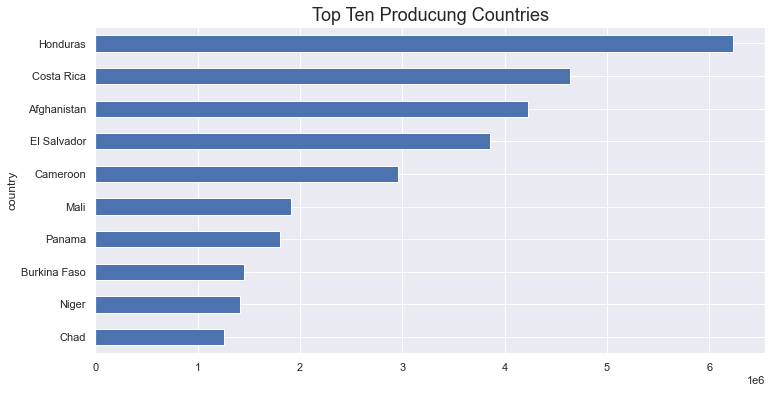

In [29]:
top_countries.sort_values(ascending= True).plot(kind='barh', figsize=(12, 6))
plt.title('Top Ten Producung Countries',fontsize=18)

## Time Series Analysis

In [30]:
import statsmodels.tsa.api as smt
import statsmodels.api as sm

## Preproceesing

In [31]:
gfp_new['date'] = pd.to_datetime(gfp_new['date'])
gfp_new.set_index("date", inplace = True)

In [32]:
gfp_new.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4125441 entries, 2000-01-01 to 2021-04-01
Data columns (total 12 columns):
 #   Column              Dtype  
---  ------              -----  
 0   country             object 
 1   city                object 
 2   market              object 
 3   currency            object 
 4   type                object 
 5   unit                object 
 6   mp_month            int64  
 7   mp_year             int64  
 8   mp_price            float64
 9   product             object 
 10  Rate Per Dollars $  float64
 11  price               float64
dtypes: float64(3), int64(2), object(7)
memory usage: 409.2+ MB


In [33]:
gfp_new.head()

,country,city,market,currency,type,unit,mp_month,mp_year,mp_price,product,Rate Per Dollars $,price
date,,,,,,,,,,,,
2000-01-01,Bassas da India,North/Amajyaruguru,Bhopal,INR,Retail,KG,1,2000,7.50,Wheat,74.19,0.10
2000-01-01,Bassas da India,North/Amajyaruguru,Bhubaneshwar,INR,Retail,KG,1,2000,16.50,Sugar,74.19,0.22
2000-01-01,Bassas da India,North/Amajyaruguru,Tiruvanantapuram,INR,Retail,KG,1,2000,72.50,Oil (mustard),74.19,0.98
2000-01-01,Bassas da India,North/Amajyaruguru,Shillong,INR,Retail,KG,1,2000,11.00,Rice,74.19,0.15
2000-01-01,Bassas da India,North/Amajyaruguru,Kolkata,INR,Retail,KG,1,2000,16.50,Sugar,74.19,0.22


## Downsampling

In [34]:
gfp_monthly = gfp_new.resample(rule= 'M').sum()
gfp_monthly.shape

(257, 5)

In [35]:
gfp_monthly.head()

,mp_month,mp_year,mp_price,Rate Per Dollars $,price
date,,,,,
2000-01-31,756,1512000,"150,427.89","1,007,721.75",437.21
2000-02-29,1508,1508000,"151,470.46","1,007,664.95",431.58
2000-03-31,2310,1540000,"154,839.44","1,012,577.65",448.27
2000-04-30,3076,1538000,"839,506.90","1,105,380.49",476.80
2000-05-31,3835,1534000,"8,442,666.35","980,225.09","92,561.86"


Text(0, 0.5, 'price')

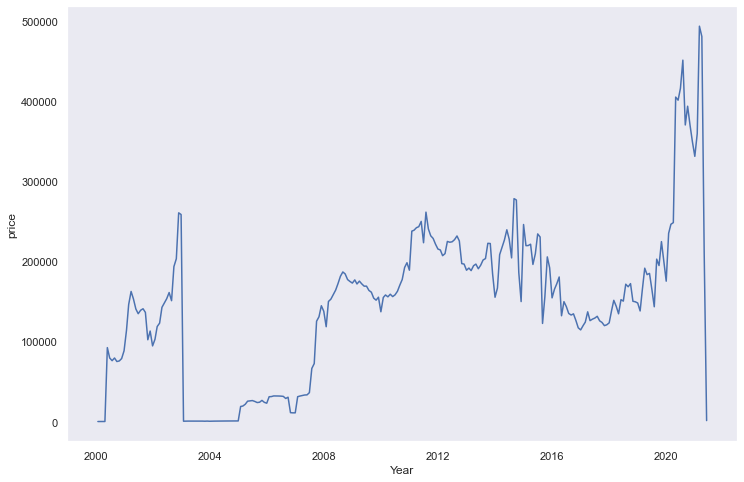

In [36]:
plt.plot(gfp_monthly.index, gfp_monthly['price'])
plt.grid()
plt.xlabel('Year')
plt.ylabel('price')

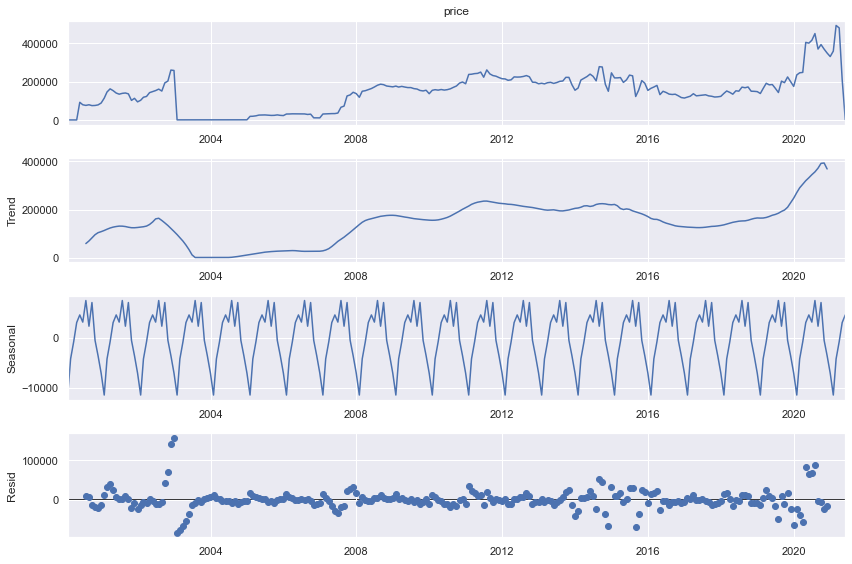

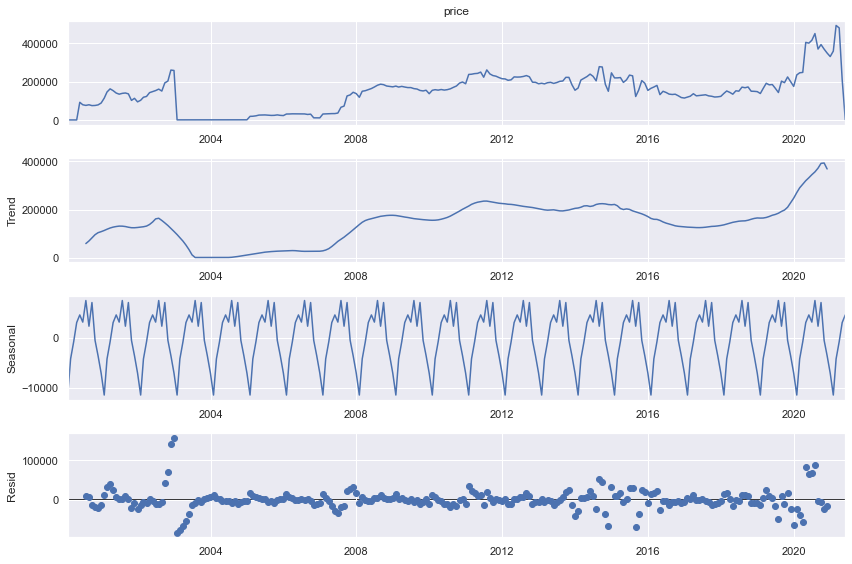

In [37]:
decompose_series = sm.tsa.seasonal_decompose(gfp_monthly['price'], model='additive')
decompose_series.plot()

In [38]:
from statsmodels.tsa.stattools import adfuller
adf_result = adfuller(gfp_monthly['price'])
print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')
print(f'No. of lags used: {adf_result[2]}')
print(f'No. of observations used : {adf_result[3]}')
print('Critical Values:')
for k, v in adf_result[4].items():   
  print(f'   {k}: {v}')

ADF Statistic: -2.2738942615132425
p-value: 0.18052585410153577
No. of lags used: 12
No. of observations used : 244
Critical Values:
   1%: -3.457437824930831
   5%: -2.873459364726563
   10%: -2.573122099570008


**From the results obtained, the p-value is greater than the critical value at a 5% significance level and,** 

**the ADF statistic is greater that any of the critical values obtain.**

**This confirms that the series is indeed non-stationary.**

**We will proceed to time series to stationary by removing trend and seasonality**

### Autocorrelation Plot

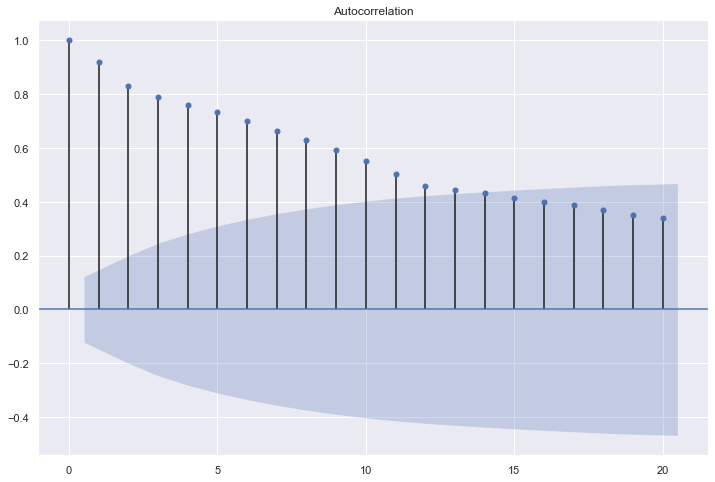

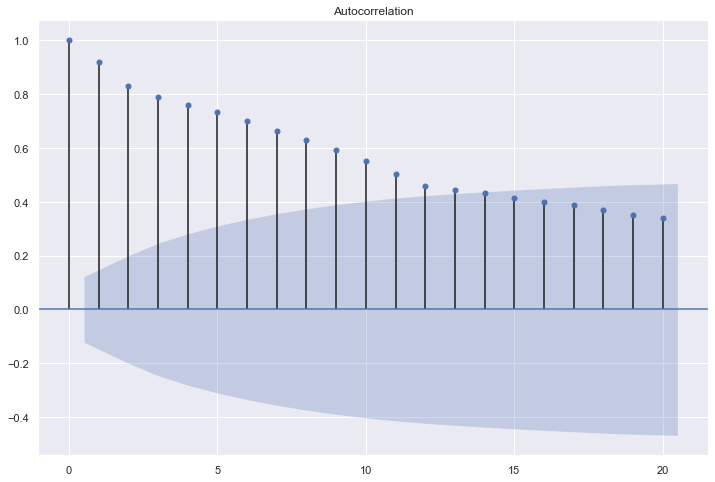

In [39]:
 #ACF - Autocorrelation Function : It measures the linear relationship between lagged values in the 
from statsmodels.tsa.stattools import  acf
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(gfp_monthly['price'], lags = 20)

### Partial Autocorrelation Plot

In [40]:
from statsmodels.tsa.stattools import  pacf
from statsmodels.graphics.tsaplots import plot_pacf

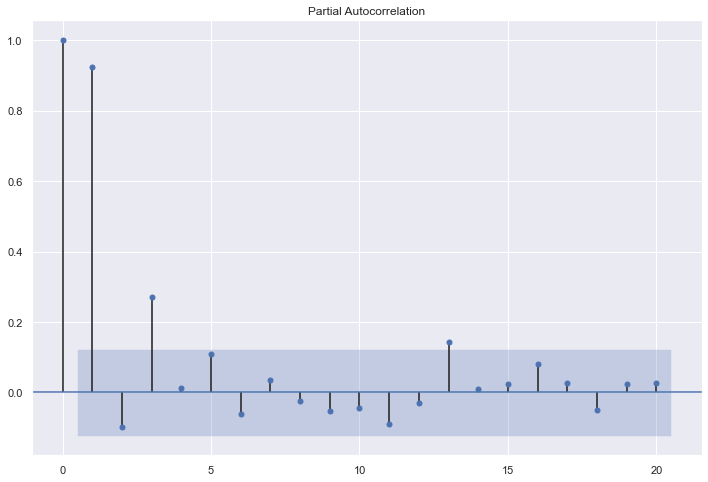

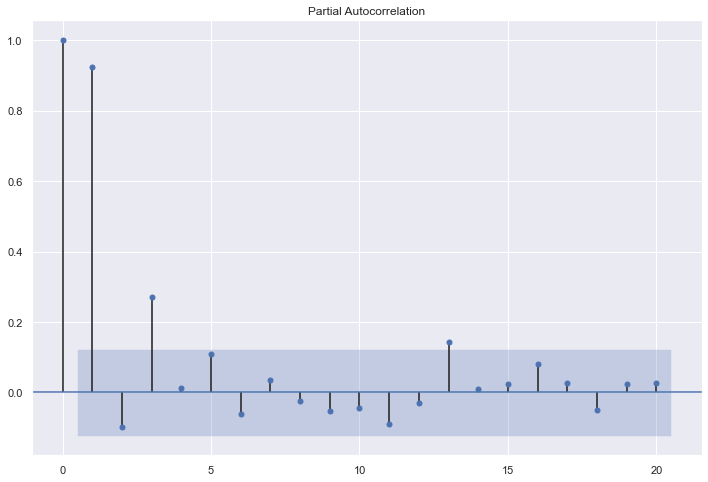

In [41]:
#PACF - Partial Autocorrelation Function (PACF) : PACF gives the partial correlation of a stationary series with its lagged values not accounted for by prior lagged observations.
plot_pacf(gfp_monthly['price'], lags = 20)

In [42]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(gfp_monthly['price'], order=(1,2,3))
model_fit= model.fit()

In [43]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:               D2.price   No. Observations:                  255
Model:                 ARIMA(1, 2, 3)   Log Likelihood               -3028.873
Method:                       css-mle   S.D. of innovations          34416.045
Date:                Fri, 09 Jul 2021   AIC                           6069.746
Time:                        18:35:53   BIC                           6090.994
Sample:                    03-31-2000   HQIC                          6078.293
                         - 05-31-2021                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const            -11.8133     21.566     -0.548      0.584     -54.082      30.456
ar.L1.D2.price     0.3099      0.201      1.539      0.124      -0.085       0.705
ma.L1.D2.price    -1.1614      0.190     -6.106      0.000      -1.534      -0.789
ma.L2.D2.price    -0.1902      0.189     -1.004      0.315      -0.561       0.181
ma.L3.D2.price     0.3516      0.070      5.058      0.000       0.215       0.488
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            3.2271           +0.0000j            3.2271            0.0000
MA.1           -1.9315           +0.0000j            1.9315            0.5000
MA.2            1.0000           +0.0000j            1.0000            0.0000
MA.3            1.4726           +0.0000j            1.4726            0.0000
-----------------------------------------------------------------------------
"""

In [44]:
plt.rcParams.update({'figure.figsize':(16,6), 'figure.dpi':120})

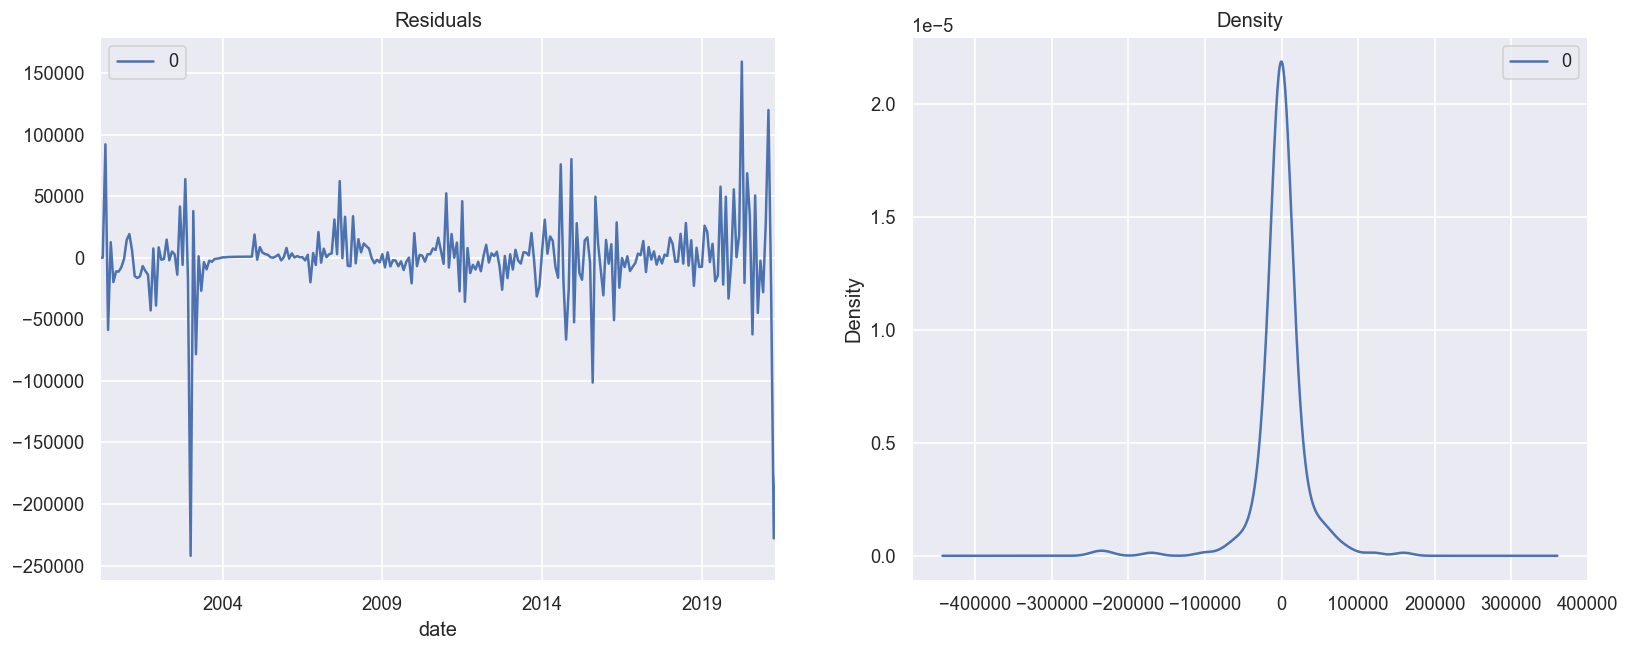

In [45]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])

In [46]:
residuals.describe()

,0
count,255.00
mean,-543.48
std,"34,900.89"
min,"-242,112.77"
25%,"-7,212.75"
50%,299.81
75%,"7,533.16"
max,"159,276.88"


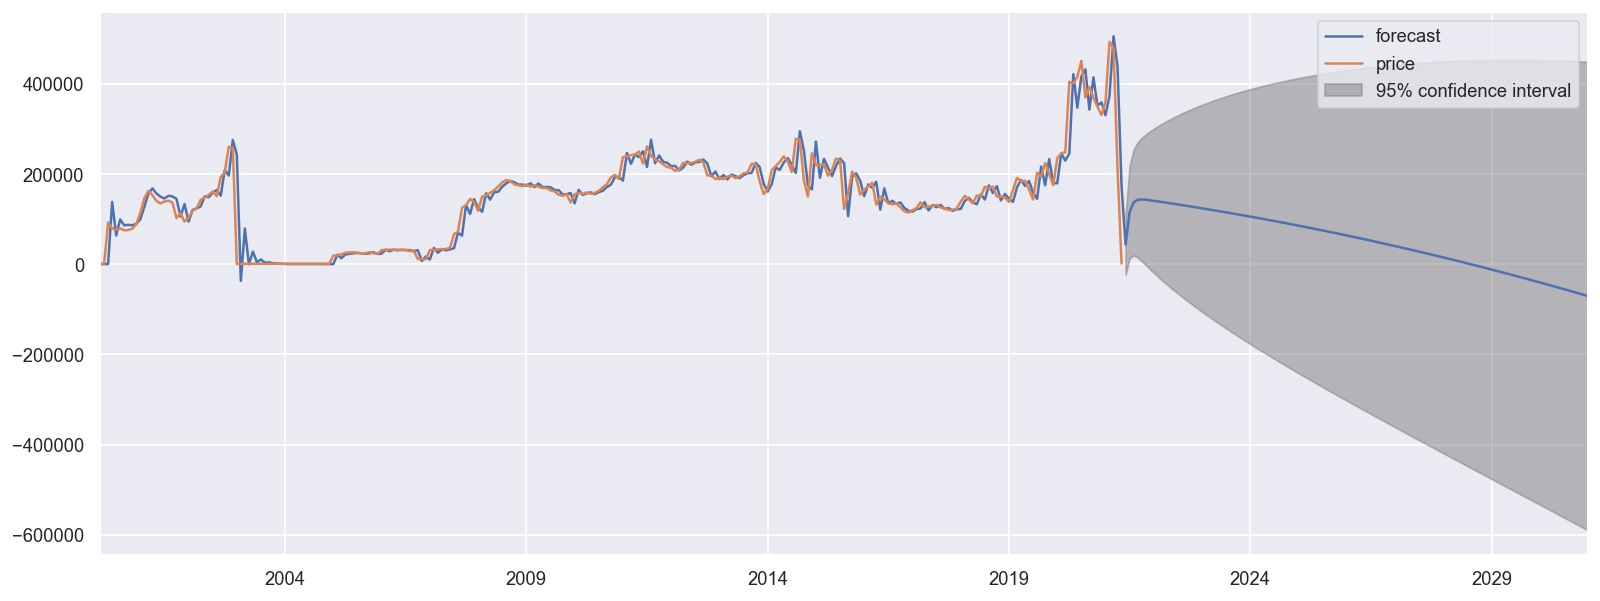

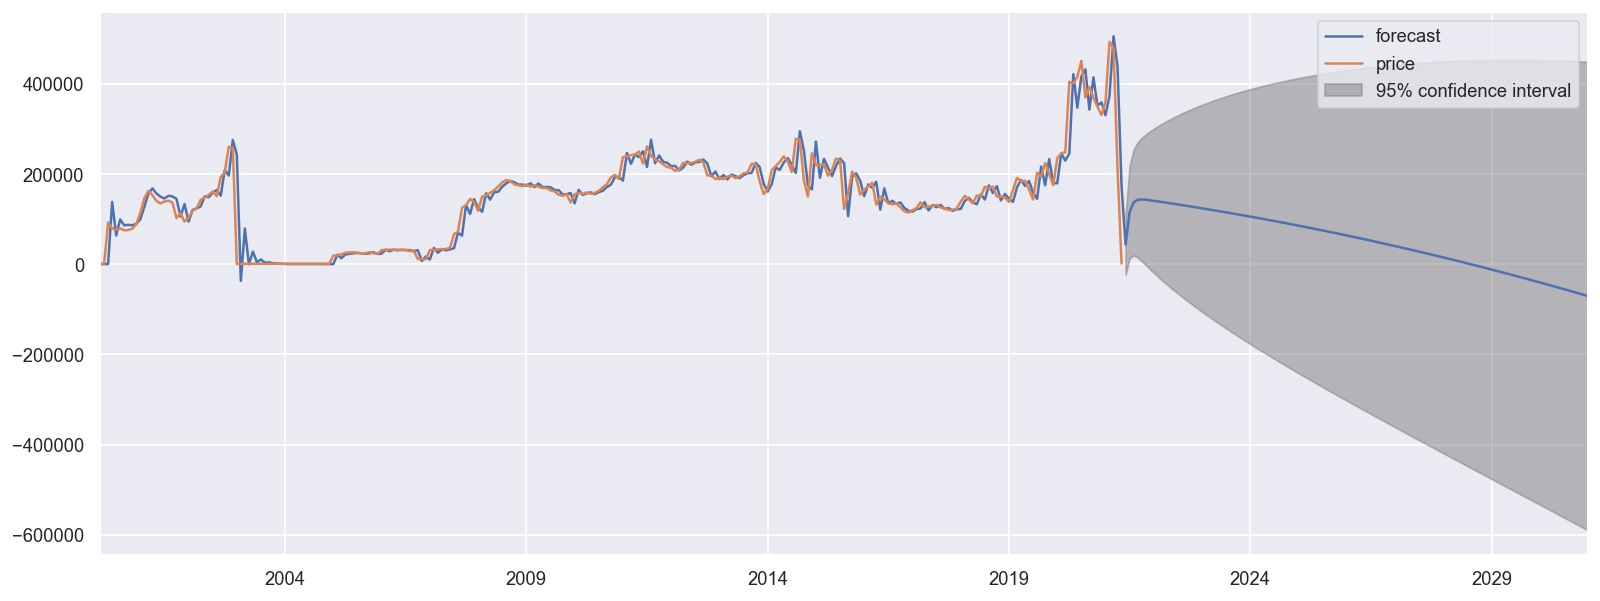

In [47]:
# Plot the original series and the forecasted series
model_fit.plot_predict(dynamic= False, start='2000', end='2031')


### Finding the optimal ARIMA model manually using Out-of-Time Cross validation

In [48]:
train_size= int(gfp_monthly.shape[0]*0.65)
gfp_train, gfp_test = gfp_monthly.price[0:train_size], gfp_monthly.price[train_size:]
gfp_train.shape

(167,)

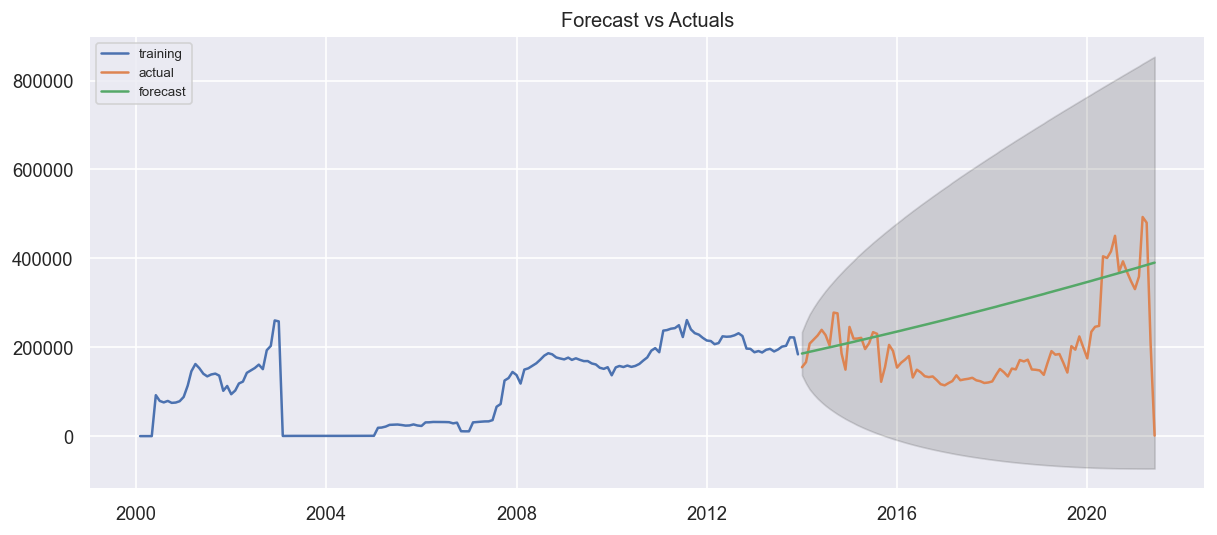

In [49]:
# Build Model
model = ARIMA(gfp_train, order=(1,2,3))
fitted = model.fit()

# Forecast
fc, se, conf = fitted.forecast(90, alpha=0.05)

# Make as pandas series
fc_series = pd.Series(fc, index=gfp_test.index)
lower_series = pd.Series(conf[:, 0], index=gfp_test.index)
upper_series = pd.Series(conf[:, 1], index=gfp_test.index)

# Plot
plt.figure(figsize=(12,5), dpi=120)
plt.plot(gfp_train, label='training')
plt.plot(gfp_test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)

In [50]:
# Accuracy metrics
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(forecast))*100
    mae = np.mean(np.abs(forecast - actual)) 
    rmse = np.sqrt(np.mean((forecast - actual)**2))         
    return({'mape':mape, 'mae': mae, 
           'rmse':rmse})

forecast_accuracy(fc, gfp_test.values)

{'mape': 34.545942427855394,
 'mae': 100692.1909467448,
 'rmse': 119716.64597057308}